# Tensorflow

## A taste of static graph

Unlike one usually expect, tensorflow defines a compute graph 

In [7]:
import tensorflow as tf

a = tf.constant(1.0)
b = tf.constant(1.0)
c = a+b

a, b, c

(<tf.Tensor 'Const_8:0' shape=() dtype=float32>,
 <tf.Tensor 'Const_9:0' shape=() dtype=float32>,
 <tf.Tensor 'add_4:0' shape=() dtype=float32>)

The values are only evaluated when a 

In [10]:
sess = tf.Session()
sess.run(c)
sess.close()

The variables can also be fined as a placeholder

Here you can show only "relavent" part of  the graph is evaluated.

In [13]:
a = tf.placeholder(dtype=tf.float32)
b = tf.zeros([10,10])
c = a + b
d = tf.placeholder(dtype=tf.float32)
e = a + d

sess = tf.Session()
output = sess.run(c, feed_dict={a:1})
print(output)
sess.close()

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


## Some basic move

In [46]:
a = tf.constant([[0,1],[2,3]])
b = tf.constant([[1,2],[3,4],[5,6]])
sess = tf.Session()

In [48]:
c = tf.matmul(b, a)
print(c.shape)
sess.run(c)

(3, 2)


array([[ 4,  7],
       [ 8, 15],
       [12, 23]], dtype=int32)

In [51]:
d = tf.reduce_sum(c, axis=1)
print(d.shape)
sess.run(d)

(3,)


array([11, 23, 35], dtype=int32)

## Back propogation

The 

In [14]:
a = tf.placeholder

## Learn a simple function with perceptron

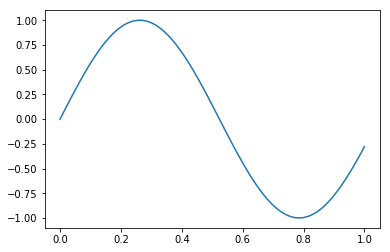

In [461]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(0,1,100)
y_train = np.sin(x_train*6)

plt.plot(x_train, y_train)

In [462]:
n_percep = 500
w_data = np.random.rand(n_percep)-0.5
b_data = np.random.rand(n_percep)-0.5

## Prepare the Graph

In [463]:
w = tf.placeholder(shape=[n_percep], dtype=tf.float32, name='w')
b = tf.placeholder(shape=[n_percep], dtype=tf.float32, name='b')
x = tf.placeholder(shape=[100], dtype=tf.float32, name='x')
y = tf.placeholder(shape=[100], dtype=tf.float32, name='y')

#
x_mat = tf.expand_dims(x, axis=1)
w_mat = tf.expand_dims(w, axis=0)

y_pred = tf.reduce_sum(tf.sigmoid(tf.matmul(x_mat, w_mat)+b)-0.5, axis=1)

error = tf.reduce_mean(tf.square(y_pred-y))

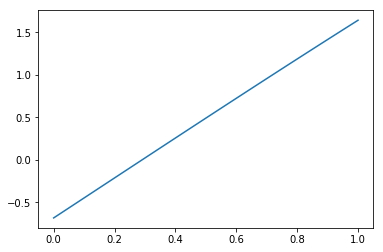

In [464]:
plt.plot(x_train, sess.run(y_pred, feed_dict={x: x_train, w: w_data, b: b_data}))

In [465]:
de_dw = tf.gradients(error, w)[0]
de_db = tf.gradients(error, b)[0]

In [481]:
for i in range(10000):
    dw, db = sess.run([de_dw, de_db], 
                      feed_dict={x: x_train, y: y_train, w: w_data, b: b_data})
    w_data -= dw * 0.1
    b_data -= db * 0.1

In [482]:
np.mean((sess.run(y_pred, feed_dict={x: x_train, w: w_data, b: b_data})-y_train)**2),sess.run(error, feed_dict={y:y_train, x: x_train, w: w_data, b: b_data})

(0.0025548350833531973, 0.002554835)

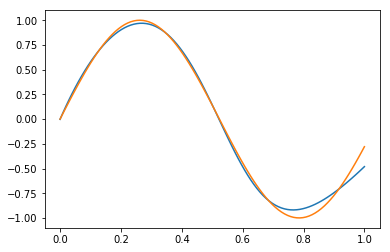

In [483]:
plt.plot(x_train, sess.run(y_pred, feed_dict={x: x_train, w: w_data, b: b_data}))
plt.plot(x_train, y_train)